In [1]:
import os
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
events_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                           'sample_audvis_filt-0-40_raw-eve.fif')
events = mne.read_events(events_file)

In [2]:
fig = raw.plot()
fig.canvas.key_press_event('a')

<Figure size 640x480 with 5 Axes>

C:\Users\rkm14\.conda\envs\python_3.7\lib\site-packages\mne\viz\utils.py:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


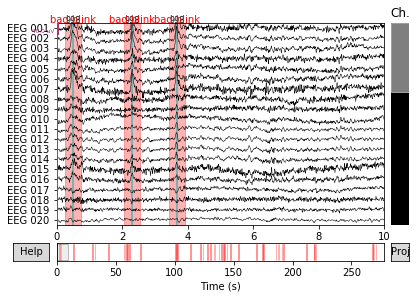

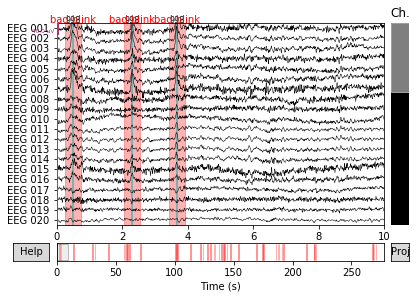

In [4]:
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)
raw.plot(events=eog_events, order=eeg_picks)

In [5]:
reject_criteria = dict(mag=3000e-15,     # 3000 fT
                       grad=3000e-13,    # 3000 fT/cm
                       eeg=100e-6,       # 100 μV
                       eog=200e-6)       # 200 μV

flat_criteria = dict(mag=1e-15,          # 1 fT
                     grad=1e-13,         # 1 fT/cm
                     eeg=1e-6)           # 1 μV

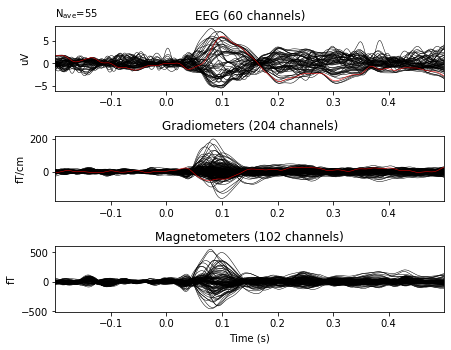

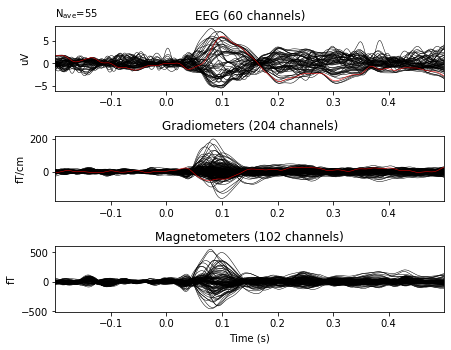

In [10]:
evoked.plot(exclude=[])

319 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003']
8 bad epochs dropped


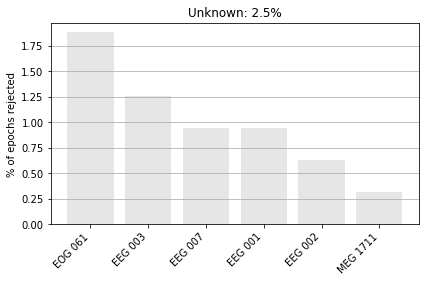

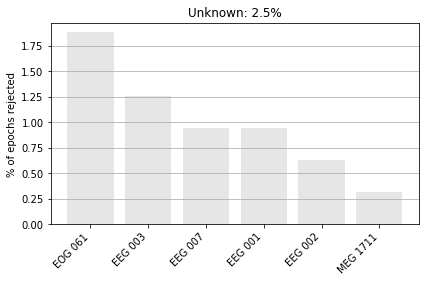

In [6]:
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, reject_tmax=0,
                    reject=reject_criteria, flat=flat_criteria,
                    reject_by_annotation=False, preload=True)
epochs.plot_drop_log()

In [8]:
print(epochs.drop_log)

[['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], [], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], ['bad blink'], ['bad blink'], ['bad blink'], ['bad blink'], ['bad blink'], [], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['MEG 1711'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], ['bad blink'], ['bad blink'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bad blink'], ['bad blink'], [], [], [

In [18]:
epochs.drop_bad()

Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped


<Epochs  |   55 events (all good), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.5 MB, data not loaded,
 'auditory/left': 55>

In [10]:
stronger_reject_criteria = dict(mag=2000e-15,     # 2000 fT
                                grad=2000e-13,    # 2000 fT/cm
                                eeg=100e-6,       # 100 μV
                                eog=100e-6)       # 100 μV

epochs.drop_bad(reject=stronger_reject_criteria)
print(epochs.drop_log)

    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1411', 'MEG 1421', 'MEG 1431', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1421', 'MEG 1431', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1411', 'MEG 1421', 'MEG 1431', 'MEG 1441', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1421', 'MEG 1431', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0141', 'MEG 1421', 'MEG 1431', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1421', 'MEG 1431']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1411', 'MEG 1421', 'MEG 1431', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0141', 'MEG 1421', 'MEG 1431', 'MEG 1541', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 1421', 'MEG 1431', 'MEG 2621']
    Rejecting  epoch based on MAG : ['MEG 0111', 'MEG 0